In [ ]:
import pandas as pd
import numpy as np

In [34]:
np.random.seed(42)
#Create Data
cluster1 = np.random.normal(loc=[2, 2], scale=0.3, size=(100, 2))   # Cluster 1
cluster2 = np.random.normal(loc=[6, 6], scale=0.3, size=(100, 2))   # Cluster 2
cluster3 = np.random.normal(loc=[10, 2], scale=0.3, size=(100, 2))  # Cluster 3

#Generate Local Outliers (near cluster1 but slightly far)
local_outliers = np.random.normal(loc=[3.0, 3.0], scale=0.1, size=(5, 2))
local_outliers1 = np.random.normal(loc=[7.0,7.0], scale=0.2, size=(3,2))
#Generate Global Outliers (far away from any cluster)
global_outliers = np.random.uniform(low=-4, high=15, size=(10, 2))

#Combine all data
X = np.vstack((cluster1, cluster2, cluster3, local_outliers, local_outliers1, global_outliers))

In [35]:
X

array([[ 2.14901425,  1.95852071],
       [ 2.19430656,  2.45690896],
       [ 1.92975399,  1.92975891],
       [ 2.47376384,  2.23023042],
       [ 1.85915768,  2.16276801],
       [ 1.86097469,  1.86028107],
       [ 2.07258868,  1.42601593],
       [ 1.48252465,  1.83131374],
       [ 1.69615066,  2.0942742 ],
       [ 1.72759278,  1.57630889],
       [ 2.43969463,  1.93226711],
       [ 2.02025846,  1.57257554],
       [ 1.83668518,  2.03327678],
       [ 1.65470193,  2.11270941],
       [ 1.81980839,  1.91249188],
       [ 1.81948802,  2.55568346],
       [ 1.99595083,  1.68268672],
       [ 2.24676347,  1.63374691],
       [ 2.06265908,  1.41209896],
       [ 1.60154419,  2.05905837],
       [ 2.22153997,  2.05141048],
       [ 1.96530552,  1.90966889],
       [ 1.5564434 ,  1.78404674],
       [ 1.86180837,  2.31713667],
       [ 2.10308549,  1.47108795],
       [ 2.09722519,  1.88447532],
       [ 1.7969234 ,  2.18350289],
       [ 2.30929986,  2.27938404],
       [ 1.74823474,

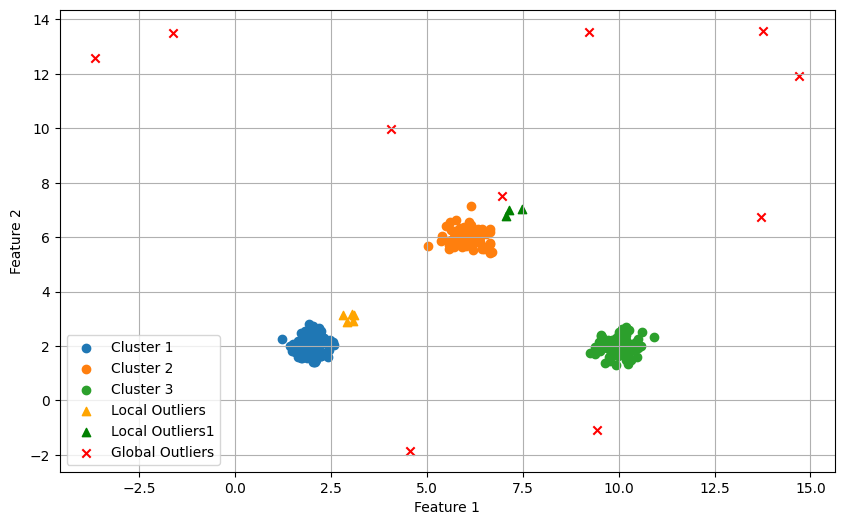

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(cluster1[:, 0], cluster1[:, 1], label='Cluster 1')
plt.scatter(cluster2[:, 0], cluster2[:, 1], label='Cluster 2')
plt.scatter(cluster3[:, 0], cluster3[:, 1], label='Cluster 3')
plt.scatter(local_outliers[:, 0], local_outliers[:, 1], c='orange', marker='^', label='Local Outliers')
plt.scatter(local_outliers1[:, 0], local_outliers1[:, 1], c='green', marker='^', label='Local Outliers1')
plt.scatter(global_outliers[:, 0], global_outliers[:, 1], c='red', marker='x', label='Global Outliers')
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [37]:
from sklearn.neighbors import LocalOutlierFactor
loc = LocalOutlierFactor(n_neighbors=10, algorithm="auto", metric="minkowski", n_jobs=-1, contamination="auto")

In [42]:
y_pred = loc.fit_predict(X)
lof_score = -loc.negative_outlier_factor_    #higher lof_scores = more anomalous
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [39]:
lof_score

array([ 1.00267136,  1.09443199,  0.9512673 ,  1.26251715,  0.98790304,
        1.00679282,  1.14801727,  1.14869773,  1.00283563,  1.24063971,
        1.26464746,  1.08728159,  0.98492863,  1.02667394,  0.99406561,
        1.40454099,  1.00723296,  1.11914462,  1.1717293 ,  1.03248408,
        1.06748448,  0.96070001,  1.17476278,  1.03300894,  1.08392734,
        0.97182598,  0.99725295,  1.17386127,  0.98747189,  1.03604817,
        0.98040897,  1.15916053,  1.09645028,  1.02416907,  1.00497631,
        1.09702001,  1.06418821,  2.30244731,  0.99872498,  1.17261789,
        0.96349404,  1.25703973,  0.96224794,  1.15444745,  0.97823619,
        1.01268054,  0.98984206,  1.11069617,  1.01328984,  0.98878739,
        1.13050908,  1.01773501,  0.96322332,  1.2959089 ,  0.98405288,
        1.28728706,  1.34978382,  0.95782531,  1.02448652,  1.2348672 ,
        1.1055269 ,  1.22986124,  1.2123708 ,  1.03771221,  0.98526521,
        1.11325313,  1.00354295,  1.49275846,  0.98528159,  1.11

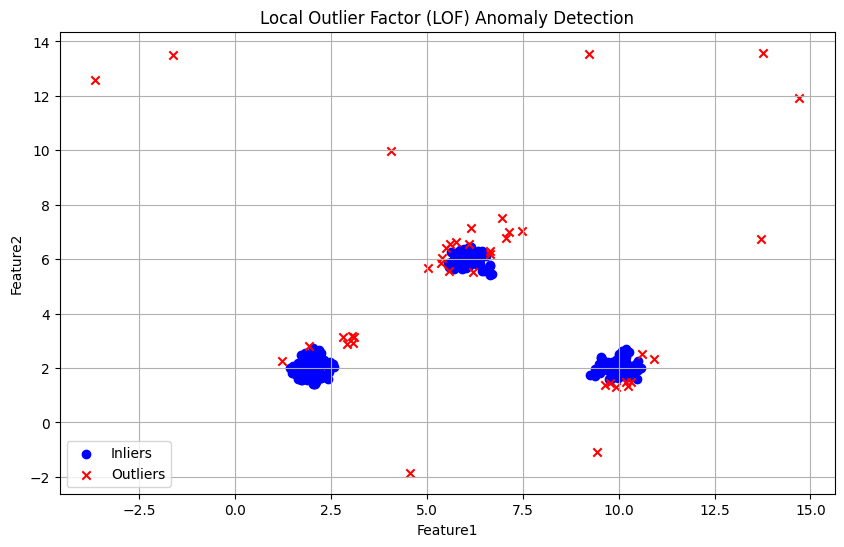

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c='b', label='Inliers')
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], c='r', marker='x', label='Outliers')
plt.title('Local Outlier Factor (LOF) Anomaly Detection')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
print(f"Total Points: {len(X)}")
print(f"Total Outliers detected: {np.sum(y_pred == -1)}")

Total Points: 318
Total Outliers detected: 40
